Andre Nguyen
CMSC320 Section 0101
Final Project: Analyzing Gun Violence in USA from 2013 - 2018

Unfortunately, gun violence has been a prevalent issue in the US and to this day continues to wreak havoc throughout the country. The data set that will be used is from https://github.com/jamesqo/gun-violence-data. This data was collected through web scraping the Gun Violence Archive website, where hundreds of thousands of cases are posted throughout the years. This data was converted into a large csv file and contains all cases from 1/1/2013 and 3/31/2018. From this data, we can learn which states had the most gun incidents and deaths due to gun violence. We can also learn what areas are commonly impacted by gun violence. The age groups of people involved in gun violence can also be analyzed. This data set is relatively clean, but for the purposes of this analysis, more cleaning is required.

Notes: 
- 2013 was not exhaustive; only 279 were catalogued
- Las Vegas Mass Shooting was not included

In the first cell, I import all of the Python packages I intend to use throughout this tutorial. I imported pandas and numpy in order to work with data sets as dataframes. I imported matplot and seaborn libraries in order to create different graphs and plots. Finally, I imported sklearn packages in order to create a model to find correlation between different variables and predict desired values.

In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
import seaborn as sns
import numpy as np

This csv file was collected and compiled from data that was provided by the Gun Violence Archive website. We can use pandas to read this file into a dataframe to easily manipulate the data. 

In [2]:
df = pd.read_csv('stage3.csv')

To clean this data set, we will remove all irrelevant columns to our analysis. We will also remove all rows with any NaN values. There are better ways to handle missing data, but in this case it would be very difficult to imputate non-quantitative values. Thus, it is best to simply remove all invalid rows.

In [3]:
df.drop(columns = ['incident_id', 'address', 'incident_url', 'source_url', 'incident_url_fields_missing', 'congressional_district', 'gun_stolen', 'incident_characteristics', 'location_description', 'notes', 'participant_name', 'participant_age_group', 'sources', 'state_house_district', 'state_senate_district'], inplace = True)
df.dropna(inplace = True)
df.reset_index(inplace = True)
df

index        date           state city_or_county  n_killed  n_injured  \
0          4  2013-01-07  North Carolina     Greensboro         2          2   
1          6  2013-01-19      New Mexico    Albuquerque         5          0   
2         16  2013-02-03      California  Yuba (county)         1          3   
3         36  2013-03-13        New York         Mohawk         6          2   
4         57  2013-04-24        Illinois     Manchester         6          1   
...      ...         ...             ...            ...       ...        ...   
8825  239553  2018-03-31         Alabama       Eclectic         2          0   
8826  239567  2018-03-31        Maryland      Crisfield         1          1   
8827  239568  2018-03-31      California     Santa Cruz         0          1   
8828  239617  2018-03-31         Florida          Miami         1          0   
8829  239676  2018-03-31           Maine   Norridgewock         2          0   

                          gun_type  latitude  longitude  n_guns_involved  \
0           0::Handgun||1::Handgun   36.1140   -79.9569              2.0   
1     0::22 LR||1::223 Rem [AR-15]   34.9791  -106.7160              2.0   
2                           0::9mm   39.1236  -121.5830              1.0   
3                       0::Shotgun   43.0110   -75.0058              1.0   
4           0::Unknown||1::Unknown   39.5417   -90.3301              2.0   
...                            ...       ...        ...              ...   
8825                    0::Unknown   32.7015   -86.0871              1.0   
8826                    0::Handgun   37.9962   -75.8392              1.0   
8827                    0::Unknown   36.9702  -122.0200              1.0   
8828                    0::Unknown   25.8343   -80.2195              1.0   
8829        0::Handgun||1::Shotgun   44.7293   -69.7691              2.0   

                                        participant_age  \
0                            0::18||1::46||2::14||3::47   
1                 0::51||1::40||2::9||3::5||4::2||5::15   
2                            0::20||4::25||5::18||6::19   
3     0::68||1::57||2::66||3::67||4::62||5::51||6::2...   
4                       0::64||1::22||2::29||3::5||4::1   
...                                                 ...   
8825                                       0::68||1::74   
8826                                       0::44||1::57   
8827                                              0::26   
8828                                        0::4||1::24   
8829                                       0::58||1::62   

                                     participant_gender  \
0                0::Female||1::Male||2::Male||3::Female   
1     0::Male||1::Female||2::Male||3::Female||4::Fem...   
2     0::Male||1::Male||2::Female||4::Male||5::Male|...   
3     0::Male||1::Male||2::Male||4::Male||5::Male||6...   
4     0::Female||1::Female||2::Male||3::Male||4::Mal...   
...                                                 ...   
8825                                   0::Male||1::Male   
8826                                 0::Female||1::Male   
8827                                   0::Male||1::Male   
8828                                 0::Female||1::Male   
8829                                 0::Female||1::Male   

                               participant_relationship  \
0                                             3::Family   
1                                             5::Family   
2     4::Drive by - Random victims||5::Drive by - Ra...   
3                                        7::Aquaintance   
4             6::Significant others - current or former   
...                                                 ...   
8825                                         1::Friends   
8826          1::Significant others - current or former   
8827                                    1::Gang vs Gang   
8828                                          1::Family   
8829          1::Significant others - current or former   

      

The data within the cells of the following columns:

- gun_type
- participant_age
- participant_gender
- participant_relationship
- participant_status
- participant_type

are in a strange format. It is supposed to be a list of dictionaries. :: separates the key-value pair and || indicates the separation of elements in the list. To deal with this, I iterated through each item within the respective column and split the item by ||. Now that I have a list of key-value pairs, I iterate through each element and parse it into a dictionary. Then I create a new column with these dictionaries. I do this for all of the mentioned columns.

In [4]:
new_gun_type = []
for item in df['gun_type'].iteritems():
    new_dict = {}
    types = item[1].split('||')
    for gun in types:
        new_dict[int(gun[0])] = gun[gun.rfind(':') + 1::]
    new_gun_type.append(new_dict)
df['gun_type_dict'] = new_gun_type

In [5]:
new_part_age = []
for item in df['participant_age'].iteritems():
    new_dict = {}
    ages = item[1].split('||')
    for part in ages:
        new_dict[int(part[0])] = int(part[part.rfind(':') + 1::])
    new_part_age.append(new_dict)
df['participant_age_dict'] = new_part_age

In [6]:
new_part_gender = []
for item in df['participant_gender'].iteritems():
    new_dict = {}
    genders = item[1].split('||')
    for part in genders:
        new_dict[int(part[0])] = part[part.rfind(':') + 1::]
    new_part_gender.append(new_dict)
df['participant_gender_dict'] = new_part_gender

In [7]:
new_part_rel = []
for item in df['participant_relationship'].iteritems():
    new_dict = {}
    rels = item[1].split('||')
    for rel in rels:
        new_dict[int(rel[0])] = rel[rel.rfind(':') + 1::]
    new_part_rel.append(new_dict)
df['participant_relationship_dict'] = new_part_rel

During this parsing process, I encountered an unexpected case. Some of the cells have incorrect formatting, so I had to adapt my approach to this.

In [8]:
new_part_stat = []
for item in df['participant_status'].iteritems():
    new_dict = {}
    stats = item[1].replace('|', '.').split('.')
    stats = [x for x in stats if len(x) > 0]
    for stat in stats:
        new_dict[int(stat[0])] = stat[stat.rfind(':') + 1::]
    new_part_stat.append(new_dict)
df['participant_status_dict'] = new_part_stat

In [9]:
new_part_type = []
for item in df['participant_type'].iteritems():
    new_dict = {}
    types = item[1].split('||')
    for typ in types:
        new_dict[int(typ[0])] = typ[typ.rfind(':') + 1::]
    new_part_type.append(new_dict)
df['participant_type_dict'] = new_part_type

Now we drop these columns as well, since we have replaced them with ones with improved formatting.

In [10]:
df.drop(columns=['gun_type', 'participant_age', 'participant_gender', 'participant_relationship', 'participant_status', 'participant_type'], inplace = True)

This is our resulting dataframe with all of the data regarding gun incidents from 1/1/13 to 3/31/18. Reminder that in 2013, not all incidents were recorded. After cleaning and parsing, the analysis can begin.

In [11]:
df

index        date           state city_or_county  n_killed  n_injured  \
0          4  2013-01-07  North Carolina     Greensboro         2          2   
1          6  2013-01-19      New Mexico    Albuquerque         5          0   
2         16  2013-02-03      California  Yuba (county)         1          3   
3         36  2013-03-13        New York         Mohawk         6          2   
4         57  2013-04-24        Illinois     Manchester         6          1   
...      ...         ...             ...            ...       ...        ...   
8825  239553  2018-03-31         Alabama       Eclectic         2          0   
8826  239567  2018-03-31        Maryland      Crisfield         1          1   
8827  239568  2018-03-31      California     Santa Cruz         0          1   
8828  239617  2018-03-31         Florida          Miami         1          0   
8829  239676  2018-03-31           Maine   Norridgewock         2          0   

      latitude  longitude  n_guns_involved  \
0      36.1140   -79.9569              2.0   
1      34.9791  -106.7160              2.0   
2      39.1236  -121.5830              1.0   
3      43.0110   -75.0058              1.0   
4      39.5417   -90.3301              2.0   
...        ...        ...              ...   
8825   32.7015   -86.0871              1.0   
8826   37.9962   -75.8392              1.0   
8827   36.9702  -122.0200              1.0   
8828   25.8343   -80.2195              1.0   
8829   44.7293   -69.7691              2.0   

                           gun_type_dict  \
0           {0: 'Handgun', 1: 'Handgun'}   
1     {0: '22 LR', 1: '223 Rem [AR-15]'}   
2                             {0: '9mm'}   
3                         {0: 'Shotgun'}   
4           {0: 'Unknown', 1: 'Unknown'}   
...                                  ...   
8825                      {0: 'Unknown'}   
8826                      {0: 'Handgun'}   
8827                      {0: 'Unknown'}   
8828                      {0: 'Unknown'}   
8829        {0: 'Handgun', 1: 'Shotgun'}   

                                   participant_age_dict  \
0                          {0: 18, 1: 46, 2: 14, 3: 47}   
1               {0: 51, 1: 40, 2: 9, 3: 5, 4: 2, 5: 15}   
2                          {0: 20, 4: 25, 5: 18, 6: 19}   
3     {0: 68, 1: 57, 2: 66, 3: 67, 4: 62, 5: 51, 6: ...   
4                     {0: 64, 1: 22, 2: 29, 3: 5, 4: 1}   
...                                                 ...   
8825                                     {0: 68, 1: 74}   
8826                                     {0: 44, 1: 57}   
8827                                            {0: 26}   
8828                                      {0: 4, 1: 24}   
8829                                     {0: 58, 1: 62}   

                                participant_gender_dict  \
0      {0: 'Female', 1: 'Male', 2: 'Male', 3: 'Female'}   
1     {0: 'Male', 1: 'Female', 2: 'Male', 3: 'Female...   
2     {0: 'Male', 1: 'Male', 2: 'Female', 4: 'Male',...   
3     {0: 'Male', 1: 'Male', 2: 'Male', 4: 'Male', 5...   
4     {0: 'Female', 1: 'Female', 2: 'Male', 3: 'Male...   
...                                                 ...   
8825                             {0: 'Male', 1: 'Male'}   
8826                           {0: 'Female', 1: 'Male'}   
8827                             {0: 'Male', 1: 'Male'}   
8828                           {0: 'Female', 1: 'Male'}   
8829                           {0: 'Female', 1: 'Male'}   

                          participant_relationship_dict  \
0                                         {3: 'Family'}   
1                                         {5: 'Family'}   
2     {4: 'Drive by - Random victims', 5: 'Drive by ...   
3                                    {7: 'Aquaintance'}   
4         {6: 'Significant others - current or former'}   
...                                                 ...   
8825                                     {1: 'Friends'}   
8826      {1: 'Significant others - current or former'}   
8827           

Now, we will start learning from our current dataset. It is important to note that most of the original data has been cleaned, even if they had some entries with meaningful values. I want to find out the total gun incidents that occurred in each state from 2013 to 2018. To do this, I created a dictionary, where each key will be a state, and the value will be the number of times they appeared in the data set. I then iterate through the rows of the dataframe and if the state hasn't been encountered before, it will be initialized in the dictionary with 1 gun incident. Otherwise, the state's number of incidents will increment by 1. After this loop, I will create a bar graph because it would be the easiest to compare the information. A pie chart may be a viable alternative, but there are so many states to compare, some slices of the pie may be too small to acknowledge in a pie chart, ie. District of Columbia.

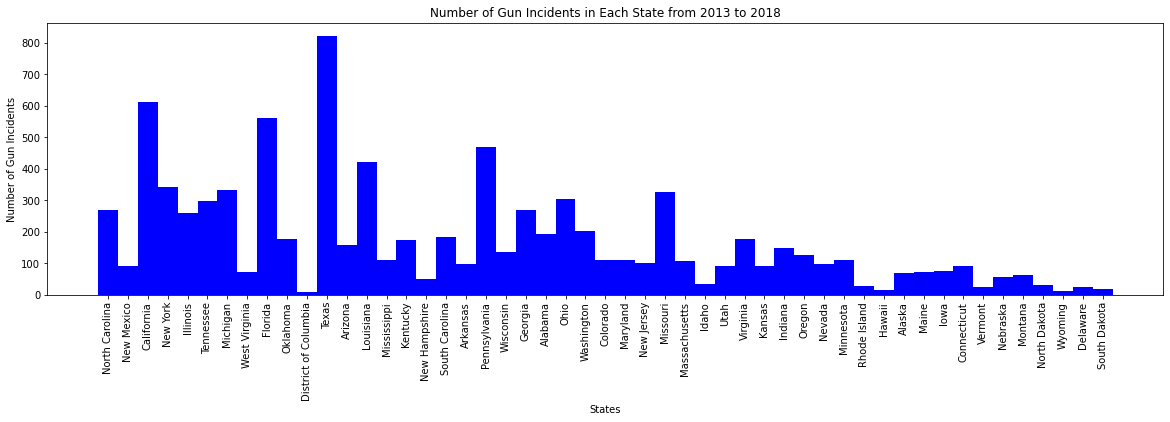

In [12]:
incidents_in_states = {}
for index, row in df.iterrows():
    if row['state'] in incidents_in_states:
        incidents_in_states[row['state']] += 1
    else:
        incidents_in_states[row['state']] = 1
plt.figure(figsize=(20, 5))
plt.xlabel("States")
plt.ylabel("Number of Gun Incidents")
plt.title("Number of Gun Incidents in Each State from 2013 to 2018")
plt.bar(incidents_in_states.keys(), incidents_in_states.values(), color ='blue', width = 1)
plt.xticks(range(len(incidents_in_states.keys())), incidents_in_states.keys(), rotation='vertical')
plt.show()

From this visual, we can learn plenty. Texas, California, and Florida are the top three states in gun incidents, while District of Columbia, Hawaii, and Wyoming are the bottom three states. We can hypothesize that the number of gun incidents are correlated to the size of the state, which makes sense because the higher the population, the more gun violence that can occur. This also makes sense in Texas and Florida, since it is a Republican state. Republicans tend to support gun owning. More research must be done to understand why gun violence is so prevalent in California, as a Democratic state. 

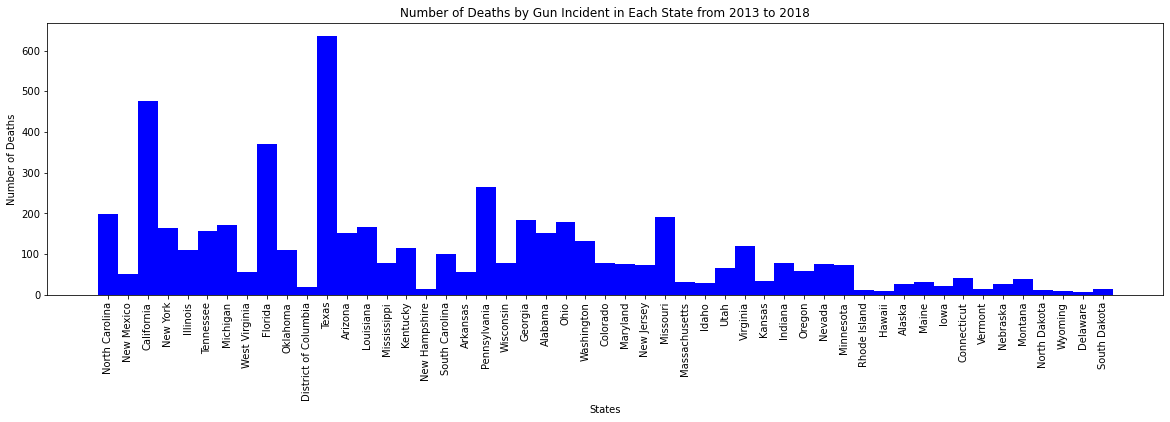

In [13]:
kills_in_states = {}
for index, row in df.iterrows():
    if row['state'] in kills_in_states:
        kills_in_states[row['state']] += row['n_killed']
    else:
        kills_in_states[row['state']] = row['n_killed']
plt.figure(figsize=(20, 5))
plt.xlabel("States")
plt.ylabel("Number of Deaths")
plt.title("Number of Deaths by Gun Incident in Each State from 2013 to 2018")
plt.bar(kills_in_states.keys(), kills_in_states.values(), color ='blue', width = 1)
plt.xticks(range(len(kills_in_states.keys())), kills_in_states.keys(), rotation='vertical')
plt.show()

The same process is repeated to see the number of deaths from gun violence correlate to number of gun incidents in a state. For the most part, there is a correlation, but there are some special cases, such as Lousiana, Massachusetts, and some others. These states had some gun incidents, but less deaths. 

From these two visualizations, we can come to the conclusion that states that are high in population density tend to have more gun incidents. 

In this next analysis, we want to find out the general age/gender of suspects and victims. This may provide insight on the type of people that are involved in these gun incidents. 

To do this, I created dictionaries to store the ages of suspects and victims. The keys would be the age and the value would be how many suspects/victims were at this age. I also did the same with the gender of suspects and victims. The key is the gender and the value would be the number of suspects/victims with this gender. It is important to note that the dataset only accepts male or female as a valid gender. 

Now, we iterate through the rows of the dataframe. For each row, we will go through the dictionary that can tell us which participant is a suspect and iterate through each key. If the key corresponds to Subject-Suspect, then it will be stored into a temporary list. Still in the same row, we will iterate through each key in the dictionary that tells us the age of the participant. If the current key is a Subject-Suspect, then the respective dictionary keys and/or values will be updated accordinly for the suspect dictionarys. Otherwise, do the same for the victims.

In [14]:
ages_of_suspects = {}
ages_of_victims = {}
gender_suspects = {'Male' : 0, 'Female' : 0}
gender_victims = {'Male' : 0, 'Female' : 0}
for index, row in df.iterrows():
    keys_of_suspects = []
    curr_type_dict = row['participant_type_dict']
    for key in curr_type_dict:
        if curr_type_dict[key] == 'Subject-Suspect':
            keys_of_suspects.append(key)
    curr_age_dict = row['participant_age_dict']
    curr_gender_dict = row['participant_gender_dict']
    for key in curr_age_dict:
        if key in keys_of_suspects:
            if key in curr_gender_dict and curr_gender_dict[key] == 'Male':
                gender_suspects['Male'] += 1
            else:
                gender_suspects['Female'] += 1
            if curr_age_dict[key] in ages_of_suspects:
                ages_of_suspects[curr_age_dict[key]] += 1
            else:
                ages_of_suspects[curr_age_dict[key]] = 1
        else:
            if key in curr_gender_dict and curr_gender_dict[key] == 'Male':
                gender_victims['Male'] += 1
            else:
                gender_victims['Female'] += 1
            if curr_age_dict[key] in ages_of_victims:
                ages_of_victims[curr_age_dict[key]] += 1
            else:
                ages_of_victims[curr_age_dict[key]] = 1

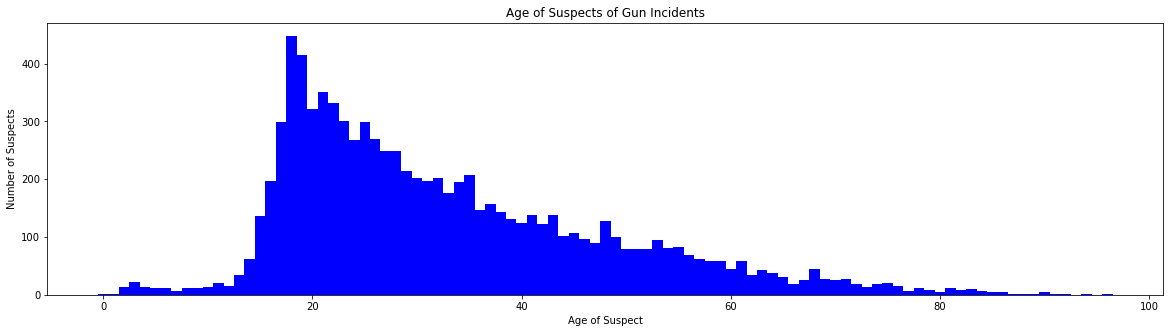

In [15]:
plt.figure(figsize=(20, 5))
plt.xlabel("Age of Suspect")
plt.ylabel("Number of Suspects")
plt.title("Age of Suspects of Gun Incidents")
plt.bar(ages_of_suspects.keys(), ages_of_suspects.values(), color ='blue', width = 1)
plt.show()

Now we plot the information that we gathered into more bar graphs. From the bar graph above, we can see the varying ages of suspects involved in gun incidents. From this bar graph, we can assume that suspects can be between 20 and 60 years old, the majority of them are arond 20 years old. There are some frightening outlier cases in which the suspect is younger than 18, even as young as 0 years old. On the contrary, there are some outlier cases in which suspects are as old as 80. These cases should be looked into individually and should be classified accordingly. 

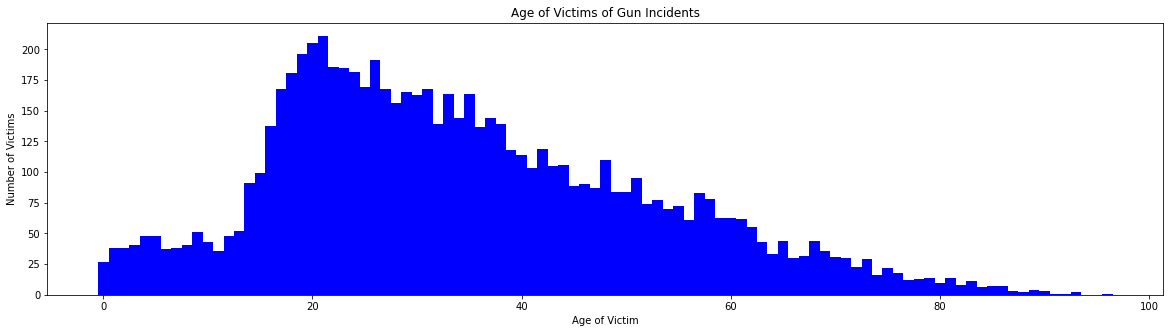

In [16]:
plt.figure(figsize=(20, 5))
plt.xlabel("Age of Victim")
plt.ylabel("Number of Victims")
plt.title("Age of Victims of Gun Incidents")
plt.bar(ages_of_victims.keys(), ages_of_victims.values(), color ='blue', width = 1)
plt.show()

The age of the victims seem to correlate strongly with the age of the suspects. However, we can still draw new conclusions from this visualization. There are significantly more victims under the age of 18 than there are suspects under the age of 18. This is most likely due to mass school shootings. Other than this, the number of victims at a certain age correlate to the number of suspects at the respective age. 

The age of the victim does not directly correspond to the age of the suspect. In other words, the one 0 year old did not kill 25 0 year olds. These two graphs are simply showing us the age of the suspects and age of the victims throughout all of the data set.

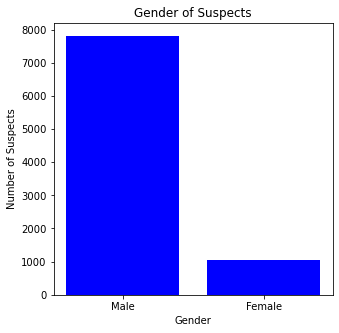

In [17]:
plt.figure(figsize=(5, 5))
plt.xlabel("Gender")
plt.ylabel("Number of Suspects")
plt.title("Gender of Suspects")
plt.bar(gender_suspects.keys(), gender_suspects.values(), color ='blue', width = .8)
plt.show()

From this bar graph, it appears to be an 8:1 ratio of male to female suspects in gun incidents.

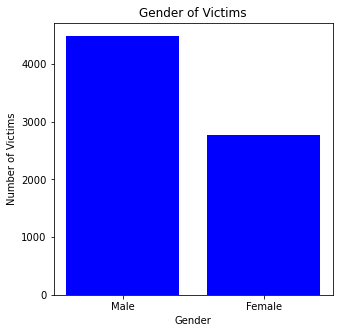

In [18]:
plt.figure(figsize=(5, 5))
plt.xlabel("Gender")
plt.ylabel("Number of Victims")
plt.title("Gender of Victims")
plt.bar(gender_victims.keys(), gender_victims.values(), color ='blue', width = .8)
plt.show()

However, there is approximately a 4:3 ratio of male to female victims. From these two bar graphs, we can see that females are less likely to be suspects, but more likely to be victims in a gun incident.

Now, we are going to use folium in order to visualize where these gun incidents are occurring in the US. First, I initialize the map to look at the United States and adjust the zoom in order to see Alaska and Hawaii as well. Then I iterate through every row of the dataframe and mark the map based on the latitude and longitude of the incident.

In [19]:
m = folium.Map(location=[50, -98.5795], zoom_start=2.5)

In [20]:
for index, row in df.iterrows():
    folium.Circle(
        radius=100,
        location=[row['latitude'], row['longitude']],
        color="crimson",
        fill=True,
    ).add_to(m)

In [21]:
m

From a quick glance, we can easily discern that gun incidents tend to occur in mid-east to east coast and in the west coast of the US. This is most likely due to the fact that there are not many people in the middle of the US. According to the census (https://www.census.gov/popclock/data_tables.php?component=growth), the majority of people live in the West and South. This does not explain why the Northeast has so many gun incidents; more research must be done. If we zoom into these regions, we can see that these incidents tend to occur in major cities in respect to their state. The population density is high in these cities or there are many people living in poverty in these places.

For the next part of the analysis, we will look at how gun types correlate to the number of kills and injuries of each incident. We will create lists to store the number of kills and injuries for each incident, the main gun type involved in the incident (we will determine this by the most "dangerous" gun involved in the incident, ie. if two guns are involved: a handgun and a rifle, the rifle will be the main gun type), and a list of all the main gun codes. 

- 0.0 => Unknown/Other Gun Type
- 1.0 => Rifle
- 2.0 => Shotgun
- 3.0 => Handgun

As usual, we will iterate through all rows of the dataframe and access the current gun_type_dict. For each key in the dictionary, append the gun's classification to a temporary list. Afterwards, we will append the main gun type and code, depending on the most "dangerous" gun. 

Once we finish looping through the dataframe, we will create a Linear Regression model. We will be using the main gun code as the independent variable and the number of kills/injuries as the dependent variable. After we fit the model and use it to predict values, we will plot our points onto a scatter plot in order to see the line of best fit.

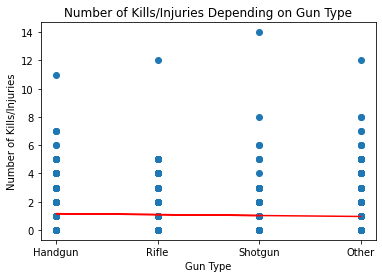

In [22]:
kills_and_injuries = []
gun_types = []
gun_code = []
for index, row in df.iterrows():
    kills_and_injuries.append(row['n_killed'] + row['n_injured'])
    curr_gun_dict = row['gun_type_dict']
    temp = []
    for key in curr_gun_dict:
        if curr_gun_dict[key] == 'Handgun' or 'mm' in curr_gun_dict[key] or 'Auto' in curr_gun_dict[key] or curr_gun_dict[key] == '40 SW' or 'Mag' in curr_gun_dict[key] or curr_gun_dict[key] == '38 Spl':
            temp.append('Handgun')
        elif curr_gun_dict[key] == 'Shotgun' or 'gauge' in curr_gun_dict[key]:
            temp.append('Shotgun')
        elif curr_gun_dict[key] == 'Rifle' or curr_gun_dict[key] == '22 LR' or curr_gun_dict[key] == '223 Rem [AR-15]' or 'Win' in curr_gun_dict[key]  or curr_gun_dict[key] == '30-06 Spr' or curr_gun_dict[key] == '300 Win' or curr_gun_dict[key] == '7.62 [AK-47]':
            temp.append('Rifle')
        else:
            temp.append('Other')
    if 'Rifle' in temp:
        gun_types.append('Rifle')
        gun_code.append(1.0)
    elif 'Shotgun' in temp:
        gun_types.append('Shotgun')
        gun_code.append(2.0)
    elif 'Handgun' in temp:
        gun_types.append('Handgun')
        gun_code.append(3.0)
    elif 'Other' in temp:
        gun_types.append('Other')
        gun_code.append(0.0)
df['main_gun_type'] = gun_types
df['main_gun_code'] = gun_code
x = np.array(df['main_gun_code']).reshape(-1, 1)
y = np.array(kills_and_injuries)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
plt.plot(x, y_pred, color="red")
plt.scatter(gun_types, kills_and_injuries)
plt.title("Number of Kills/Injuries Depending on Gun Type")
plt.xlabel("Gun Type")
plt.ylabel("Number of Kills/Injuries")
plt.show()

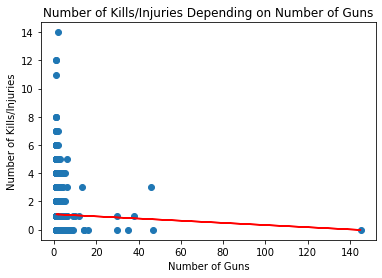

In [23]:
x = np.array(df['n_guns_involved']).reshape(-1, 1)
y = np.array(kills_and_injuries)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
plt.plot(x, y_pred, color="red")
plt.scatter(df['n_guns_involved'], kills_and_injuries)
plt.title("Number of Kills/Injuries Depending on Number of Guns")
plt.xlabel("Number of Guns")
plt.ylabel("Number of Kills/Injuries")
plt.show()

For both of these scatter plots, there appears to be little to no correlation between the main gun involved in the incident and the number of kills/injuries. It appears to be the same with the number of guns as well. As of now, we only can only say that this is because of outliers and multiple outside factors that may or may not be quantifiable.

In order to understand more about why there is no correlation, we must do some more visualizations. Below, I am creating a violin plot to be able to easily see the distribution among the number of kills/injuries. In the previous scatter plot, it clearly shows the range of kills/injuries. However, it doesn't tell us how many times 1 person was killed for each gun. The violin plot solves this problem, but makes it harder to see the less frequent values due to the number of outliers within this data set.

Text(0, 0.5, 'Number of Kills/Injuries')

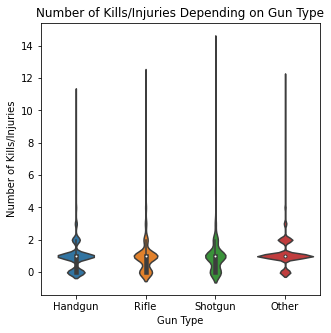

In [24]:
plt.figure(figsize=(5, 5))
sns.violinplot(x = gun_types, y = kills_and_injuries)
plt.title("Number of Kills/Injuries Depending on Gun Type")
plt.xlabel("Gun Type")
plt.ylabel("Number of Kills/Injuries")

In [25]:
kills_and_injuries_handguns = 0
kills_and_injuries_shotguns = 0
kills_and_injuries_rifles = 0
kills_and_injuries_other = 0
for index, row in df.iterrows():
    curr_gun_dict = row['gun_type_dict']
    for key in curr_gun_dict:
        if curr_gun_dict[key] == 'Handgun' or 'mm' in curr_gun_dict[key] or 'Auto' in curr_gun_dict[key] or curr_gun_dict[key] == '40 SW' or 'Mag' in curr_gun_dict[key] or curr_gun_dict[key] == '38 Spl':
            kills_and_injuries_handguns += row['n_killed'] + row['n_injured']
        elif curr_gun_dict[key] == 'Shotgun' or 'gauge' in curr_gun_dict[key]:
            kills_and_injuries_shotguns += row['n_killed'] + row['n_injured']
        elif curr_gun_dict[key] == 'Rifle' or curr_gun_dict[key] == '22 LR' or curr_gun_dict[key] == '223 Rem [AR-15]' or 'Win' in curr_gun_dict[key]  or curr_gun_dict[key] == '30-06 Spr' or curr_gun_dict[key] == '300 Win' or curr_gun_dict[key] == '7.62 [AK-47]':
            kills_and_injuries_rifles += row['n_killed'] + row['n_injured']
        else:
            kills_and_injuries_other += row['n_killed'] + row['n_injured']

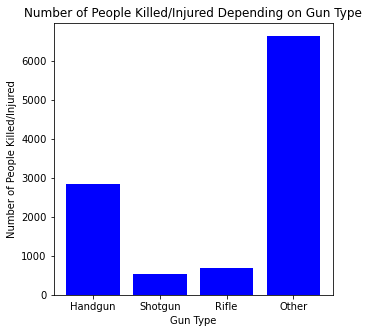

In [26]:
plt.figure(figsize=(5, 5))
plt.xlabel("Gun Type")
plt.ylabel("Number of People Killed/Injured")
plt.title("Number of People Killed/Injured Depending on Gun Type")
plt.bar(['Handgun', 'Shotgun', 'Rifle', 'Other'], [kills_and_injuries_handguns, kills_and_injuries_shotguns, kills_and_injuries_rifles, kills_and_injuries_other], color ='blue', width = .8)
plt.show()

From these new visualizations, we can understand a little more about why there doesn't seem to be a lot of correlation. The violin plot shows that no matter the gun, most gun incidents have at least 1 killed/injured participant. The bar graph above shows that many gun incidents are classified under the "Other" category, which means that the gun was unknown. With less reliable values, it is harder to correlate it to our desired dependent variable. 

In [27]:
df['kills_and_injuries'] = kills_and_injuries
df

index        date           state city_or_county  n_killed  n_injured  \
0          4  2013-01-07  North Carolina     Greensboro         2          2   
1          6  2013-01-19      New Mexico    Albuquerque         5          0   
2         16  2013-02-03      California  Yuba (county)         1          3   
3         36  2013-03-13        New York         Mohawk         6          2   
4         57  2013-04-24        Illinois     Manchester         6          1   
...      ...         ...             ...            ...       ...        ...   
8825  239553  2018-03-31         Alabama       Eclectic         2          0   
8826  239567  2018-03-31        Maryland      Crisfield         1          1   
8827  239568  2018-03-31      California     Santa Cruz         0          1   
8828  239617  2018-03-31         Florida          Miami         1          0   
8829  239676  2018-03-31           Maine   Norridgewock         2          0   

      latitude  longitude  n_guns_involved  \
0      36.1140   -79.9569              2.0   
1      34.9791  -106.7160              2.0   
2      39.1236  -121.5830              1.0   
3      43.0110   -75.0058              1.0   
4      39.5417   -90.3301              2.0   
...        ...        ...              ...   
8825   32.7015   -86.0871              1.0   
8826   37.9962   -75.8392              1.0   
8827   36.9702  -122.0200              1.0   
8828   25.8343   -80.2195              1.0   
8829   44.7293   -69.7691              2.0   

                           gun_type_dict  \
0           {0: 'Handgun', 1: 'Handgun'}   
1     {0: '22 LR', 1: '223 Rem [AR-15]'}   
2                             {0: '9mm'}   
3                         {0: 'Shotgun'}   
4           {0: 'Unknown', 1: 'Unknown'}   
...                                  ...   
8825                      {0: 'Unknown'}   
8826                      {0: 'Handgun'}   
8827                      {0: 'Unknown'}   
8828                      {0: 'Unknown'}   
8829        {0: 'Handgun', 1: 'Shotgun'}   

                                   participant_age_dict  \
0                          {0: 18, 1: 46, 2: 14, 3: 47}   
1               {0: 51, 1: 40, 2: 9, 3: 5, 4: 2, 5: 15}   
2                          {0: 20, 4: 25, 5: 18, 6: 19}   
3     {0: 68, 1: 57, 2: 66, 3: 67, 4: 62, 5: 51, 6: ...   
4                     {0: 64, 1: 22, 2: 29, 3: 5, 4: 1}   
...                                                 ...   
8825                                     {0: 68, 1: 74}   
8826                                     {0: 44, 1: 57}   
8827                                            {0: 26}   
8828                                      {0: 4, 1: 24}   
8829                                     {0: 58, 1: 62}   

                                participant_gender_dict  \
0      {0: 'Female', 1: 'Male', 2: 'Male', 3: 'Female'}   
1     {0: 'Male', 1: 'Female', 2: 'Male', 3: 'Female...   
2     {0: 'Male', 1: 'Male', 2: 'Female', 4: 'Male',...   
3     {0: 'Male', 1: 'Male', 2: 'Male', 4: 'Male', 5...   
4     {0: 'Female', 1: 'Female', 2: 'Male', 3: 'Male...   
...                                                 ...   
8825                             {0: 'Male', 1: 'Male'}   
8826                           {0: 'Female', 1: 'Male'}   
8827                             {0: 'Male', 1: 'Male'}   
8828                           {0: 'Female', 1: 'Male'}   
8829                           {0: 'Female', 1: 'Male'}   

                          participant_relationship_dict  \
0                                         {3: 'Family'}   
1                                         {5: 'Family'}   
2     {4: 'Drive by - Random victims', 5: 'Drive by ...   
3                                    {7: 'Aquaintance'}   
4         {6: 'Significant others - current or former'}   
...                                                 ...   
8825                                     {1: 'Friends'}   
8826      {1: 'Significant others - current or former'}   
8827           

Despite the lack of correlation, we will make another model to predict number of people killed. Earlier, we created a Linear Regression model to fit the data and now we will use a Decision Tree. We should split our data into training and test data. The training data will be used to predict values and the predicted values will be compared with the test data in order to see how accurate our Decision Tree is. After fitting our data, we find the cross validation score in order to determine how accurate our model is. We will do this using the main gun code and the number of guns involved as our independent variables.

In [28]:
y = df[['kills_and_injuries']]
X = df[['main_gun_code']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 10)
X_train.shape, X_test.shape
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
print('Accuracy score for Decision Tree: ' + str(cross_val_score(dt, X_test, y_test, cv=5, scoring='accuracy').mean()))

Accuracy score for Decision Tree: 0.6155154244683877


C:\Users\andre\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [29]:
y = df[['kills_and_injuries']]
X = df[['n_guns_involved']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 10)
X_train.shape, X_test.shape
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
print('Accuracy score for Decision Tree: ' + str(cross_val_score(dt, X_test, y_test, cv=5, scoring='accuracy').mean()))

Accuracy score for Decision Tree: 0.6149484515428475


C:\Users\andre\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


The Decision Tree had an accuracy score of approximately 61% each. This could be more accurate, but the data that is provided is not enough to accurately tell how many participants would be killed/injured. There are too many outside factors to account for that are not quantifiable or difficult to collect.

From this tutorial, we have learned a lot about gun violence. We learned the demographic of the suspects, who tend to be males around the ages of 20 to 30. The demographic of the victems tend to also be around males around the ages of 20 to 30. It is important to note that there are way more female victims than female suspects and this is the case for those under the age of 18. We can see that gun violence is an issue in cities, where the population density tends to be high. We also learned that from this data set, there is little to no correlation to number of guns/types of guns in an incident and the number of participants killed/injured. This is due to outside factors that are not within our data set because of how difficult it is to quantify. There are too many variables too account for when reporting crime. 

In the data science lifecycle, we collect, process, analyze, then visualize the data. Then we draw a hypothesis and attempt to create a model to support our hypothesis. The final step is make decisions on what to do next. From the information we have gathered, we can educate policymakers on the state of the country in regards to gun violence. To improve our hypothesis and machine learning models, we can collect more data in order to have a better gauge of the situation. We will then have a better idea on how to approach this problem and be able to save lives.